In [13]:
import pandas as pd

# Load raw CSV files (update file names if different)
stores = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\stores.csv")
products = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\products.csv")
sales = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\sales_data.csv")
customers = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\customers.csv")
returns = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\returns.csv")

In [17]:
# Cleaning products table
import pandas as pd

# Load
products = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\products.csv")

# 1. Handle missing values
products['brand'] = products['brand'].fillna('Unknown')

# 2. Standardize column data types
products['product_id'] = products['product_id'].astype(str)
products['product_name'] = products['product_name'].astype(str)
products['category'] = products['category'].astype(str)
products['brand'] = products['brand'].astype(str)

# Ensure numeric columns are numeric
products['cost_price'] = pd.to_numeric(products['cost_price'], errors='coerce')
products['unit_price'] = pd.to_numeric(products['unit_price'], errors='coerce')
products['margin_pct'] = pd.to_numeric(products['margin_pct'], errors='coerce')

# 3. Remove leading/trailing spaces
products['product_name'] = products['product_name'].str.strip()
products['category'] = products['category'].str.strip()
products['brand'] = products['brand'].str.strip()

# 4. Drop duplicates
products = products.drop_duplicates()

# 5. Reset index
products = products.reset_index(drop=True)

print(products.info())
print(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1200 non-null   object 
 1   product_name  1200 non-null   object 
 2   category      1200 non-null   object 
 3   brand         1200 non-null   object 
 4   cost_price    1200 non-null   float64
 5   unit_price    1200 non-null   float64
 6   margin_pct    1200 non-null   float64
dtypes: float64(3), object(4)
memory usage: 65.8+ KB
None
  product_id           product_name     category   brand  cost_price  \
0      P0000        BrandA Shoulder  Electronics  BrandC       52.75   
1      P0001  BrandA Responsibility  Electronics  BrandD       11.20   
2      P0002           BrandB Small  Electronics  BrandB      144.62   
3      P0003        BrandD Continue      Apparel  BrandD      119.91   
4      P0004          BrandA Indeed      Apparel  BrandD       71.35   

   unit_price  m

In [19]:
# Final Products Cleaning

# 1. Strip spaces and standardize case
products['product_name'] = products['product_name'].str.strip().str.title()
products['category'] = products['category'].str.strip().str.title()
products['brand'] = products['brand'].str.strip().str.title()

# 2. Remove duplicates
products = products.drop_duplicates(subset=['product_id'])

# 3. Check for invalid prices (negative or zero)
products = products[(products['cost_price'] > 0) & (products['unit_price'] > 0)]

# 4. Reset index
products = products.reset_index(drop=True)

print("Products cleaned ✅")
print(products.info())
print(products.head())


Products cleaned ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1200 non-null   object 
 1   product_name  1200 non-null   object 
 2   category      1200 non-null   object 
 3   brand         1200 non-null   object 
 4   cost_price    1200 non-null   float64
 5   unit_price    1200 non-null   float64
 6   margin_pct    1200 non-null   float64
dtypes: float64(3), object(4)
memory usage: 65.8+ KB
None
  product_id           product_name     category   brand  cost_price  \
0      P0000        Branda Shoulder  Electronics  Brandc       52.75   
1      P0001  Branda Responsibility  Electronics  Brandd       11.20   
2      P0002           Brandb Small  Electronics  Brandb      144.62   
3      P0003        Brandd Continue      Apparel  Brandd      119.91   
4      P0004          Branda Indeed      Apparel  Brandd       71.35  

In [23]:
# 🔹 Clean Sales Table
# 1. Handle missing store_id
sales['store_id'] = sales['store_id'].fillna("Unknown")

# 2. Ensure correct datatypes
sales['order_id'] = sales['order_id'].astype(str)
sales['customer_id'] = sales['customer_id'].astype(str)
sales['product_id'] = sales['product_id'].astype(str)
sales['store_id'] = sales['store_id'].astype(str)
sales['sales_channel'] = sales['sales_channel'].astype(str)

sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['quantity'] = sales['quantity'].astype(int)
sales['unit_price'] = sales['unit_price'].astype(float)
sales['discount_pct'] = sales['discount_pct'].astype(float)
sales['total_amount'] = sales['total_amount'].astype(float)

# 3. Remove leading/trailing spaces in categorical columns
for col in ['sales_channel', 'store_id']:
    sales[col] = sales[col].str.strip().str.title()

# 4. Sanity check: ensure total_amount = quantity * unit_price * (1 - discount_pct/100)
sales['calculated_amount'] = sales['quantity'] * sales['unit_price'] * (1 - sales['discount_pct']/100)

# Compare with total_amount
diff = (sales['total_amount'] - sales['calculated_amount']).abs().sum()
print(f"Total mismatch in amounts: {diff:.2f}")

# Drop helper column
sales.drop(columns=['calculated_amount'], inplace=True)

print("✅ Sales cleaned")
print(sales.info())
print(sales.head())

Total mismatch in amounts: 76208.49
✅ Sales cleaned
<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3000 non-null   object        
 1   order_date     3000 non-null   datetime64[ns]
 2   customer_id    3000 non-null   object        
 3   product_id     3000 non-null   object        
 4   store_id       3000 non-null   object        
 5   sales_channel  3000 non-null   object        
 6   quantity       3000 non-null   int32         
 7   unit_price     3000 non-null   float64       
 8   discount_pct   3000 non-null   float64       
 9   total_amount   3000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(5)
memory usage: 246.1+ KB
None
  order_id order_date customer_id product_id store_id sales_channel  quantity  \
0   O00000 2024-01-31       C0125      P1086  Unknown        Onli

In [27]:
# 🔹 Clean Customers Table
# 1. Check missing values
print(customers.isna().sum())

# 2. Convert datatypes & standardize
customers['customer_id'] = customers['customer_id'].astype(str)

# Fix names (strip spaces + title case)
customers['first_name'] = customers['first_name'].astype(str).str.strip().str.title()
customers['last_name'] = customers['last_name'].astype(str).str.strip().str.title()

# Fix gender
customers['gender'] = customers['gender'].astype(str).str.strip().str.title()
customers['gender'] = customers['gender'].replace({
    'M': 'Male',
    'F': 'Female',
    'Other': 'Other'
})

# Fix age (fill missing & unrealistic)
customers['age'] = pd.to_numeric(customers['age'], errors='coerce')
customers['age'] = customers['age'].fillna(customers['age'].median())
customers.loc[(customers['age'] < 0) | (customers['age'] > 100), 'age'] = customers['age'].median()
customers['age'] = customers['age'].astype(int)

# Convert signup_date
customers['signup_date'] = pd.to_datetime(customers['signup_date'])

# Fix region (clean text)
customers['region'] = customers['region'].astype(str).str.strip().str.title()

# 3. Drop duplicates
customers = customers.drop_duplicates(subset=['customer_id'])

print("✅ Customers cleaned")
print(customers.info())
print(customers.head())

customer_id     0
first_name      0
last_name       0
gender          0
age            40
signup_date     0
region          0
dtype: int64
✅ Customers cleaned
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  800 non-null    object        
 1   first_name   800 non-null    object        
 2   last_name    800 non-null    object        
 3   gender       800 non-null    object        
 4   age          800 non-null    int32         
 5   signup_date  800 non-null    datetime64[ns]
 6   region       800 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 46.9+ KB
None
  customer_id first_name last_name  gender  age signup_date region
0       C0000    Patrick    Morgan    Male   18  2024-07-11  South
1       C0001       Eric       Lee   Other   36  2020-09-20   East
2       C0002     Thomas 

In [39]:
# Load returns data
returns = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\returns.csv")

# 1. Check missing values
print(returns.isnull().sum())

# 2. Remove duplicates
returns.drop_duplicates(inplace=True)

# 3. Clean Returns dataset
returns['return_id'] = returns['return_id'].astype(str)
returns['order_id'] = returns['order_id'].astype(str)
returns['return_date'] = pd.to_datetime(returns['return_date'])

# Clean return_reason safely: strip spaces, title case, fill missing
returns['return_reason'] = returns['return_reason'].str.strip().str.title().fillna('Unknown')

print("✅ Returns cleaned")
print(returns.info())
print(returns.head())


return_id        0
order_id         0
return_date      0
return_reason    0
dtype: int64
✅ Returns cleaned
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   return_id      200 non-null    object        
 1   order_id       200 non-null    object        
 2   return_date    200 non-null    datetime64[ns]
 3   return_reason  200 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.8+ KB
None
  return_id order_id return_date     return_reason
0     R0000   O02237  2024-03-05         Defective
1     R0001   O01700  2025-03-18         Defective
2     R0002   O01451  2025-02-18     Late Delivery
3     R0003   O02759  2023-10-26         Defective
4     R0004   O00415  2024-08-06  No Longer Needed


In [43]:
# Load stores data
stores = pd.read_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Raw Data\stores.csv")

# 1. Check missing values
print(stores.isnull().sum())

# 2. Remove duplicates
stores = stores.drop_duplicates()

# 3. Correct data types
stores['store_id'] = stores['store_id'].astype(str)
stores['store_name'] = stores['store_name'].astype(str)
stores['store_type'] = stores['store_type'].astype(str)
stores['region'] = stores['region'].astype(str)
stores['city'] = stores['city'].astype(str)
stores['operating_cost'] = stores['operating_cost'].astype(float)

# 4. Remove leading/trailing spaces
for col in ['store_name', 'store_type', 'region', 'city']:
    stores[col] = stores[col].str.strip()

# 5. Handle missing values safely
stores['store_type'] = stores['store_type'].fillna('Unknown')
stores['operating_cost'] = stores['operating_cost'].fillna(stores['operating_cost'].median())

print("✅ Stores cleaned")
print(stores.info())
print(stores.head())


store_id          0
store_name        0
store_type        0
region            0
city              0
operating_cost    0
dtype: int64
✅ Stores cleaned
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store_id        60 non-null     object 
 1   store_name      60 non-null     object 
 2   store_type      60 non-null     object 
 3   region          60 non-null     object 
 4   city            60 non-null     object 
 5   operating_cost  60 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.3+ KB
None
  store_id                 store_name store_type region         city  \
0     S000          Vincent Inc Store  Franchise   West      Chicago   
1     S001           Wilson Inc Store   Flagship   East      Chicago   
2     S002  Washington-Trujillo Store  Franchise  North  Los Angeles   
3     S003     Santana and Sons Store  Franchise

In [62]:
# Save cleaned tables into CSVs
sales.to_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Cleaned\sales_cleaned.csv", index=False)
customers.to_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Cleaned\customers_cleaned.csv", index=False)
products.to_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Cleaned\products_cleaned.csv", index=False)
stores.to_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Cleaned\stores_cleaned.csv", index=False)
returns.to_csv(r"C:\Users\hp\Desktop\Project Works and Files\Retail_Sales_Capstone\DATA\Cleaned\returns_cleaned.csv", index=False)

print("✅ All cleaned tables saved successfully in the 'cleaned' folder.")

✅ All cleaned tables saved successfully in the 'cleaned' folder.


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='order_date'>

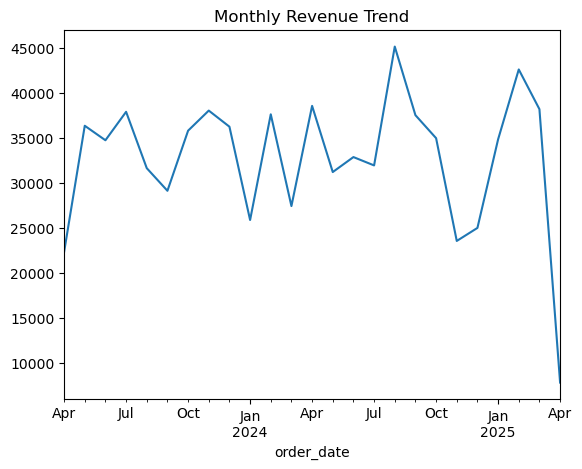

In [56]:
# Revenue trend
sales.groupby(sales['order_date'].dt.to_period('M'))['total_amount'].sum().plot(kind='line', title="Monthly Revenue Trend")

In [58]:
# Top products
top_products = sales.groupby('product_id')['quantity'].sum().nlargest(5)
print(top_products)

product_id
P0820    40
P0053    33
P0336    33
P0874    32
P1123    27
Name: quantity, dtype: int32


In [60]:
# Online vs Store
print(sales['sales_channel'].value_counts())

sales_channel
In-Store    2092
Online       908
Name: count, dtype: int64


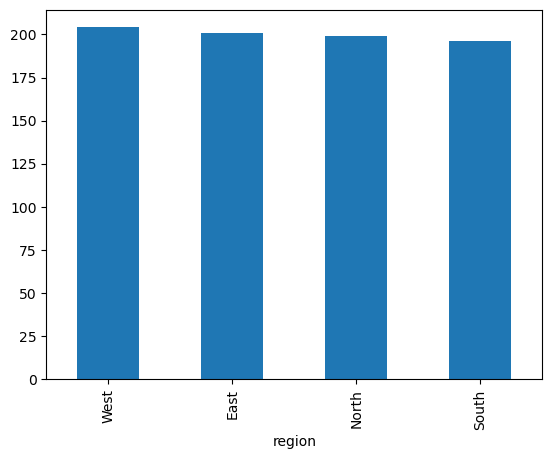

In [48]:
#Customers Table
#.Gender distribution
#Age distribution (histogram)
#Region-wise customer count

Customer tenure (today - signup_date)
customers['age'].hist(bins=20)
customers['region'].value_counts().plot(kind='bar')
customers['tenure_days'] = (pd.to_datetime("today") - customers['signup_date']).dt.days


<Axes: xlabel='category'>

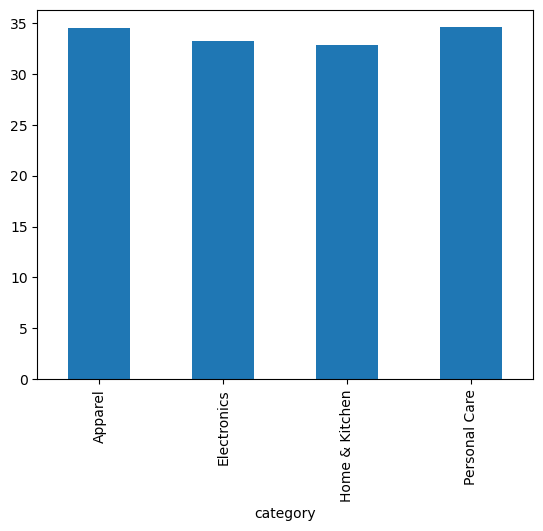

In [50]:
#Prodcut table 
#Most profitable categories (using margin%)
#Cost vs Price distribution
#Brand analysis (top-selling brands)

products.groupby('category')['margin_pct'].mean().plot(kind='bar')

<Axes: xlabel='store_type'>

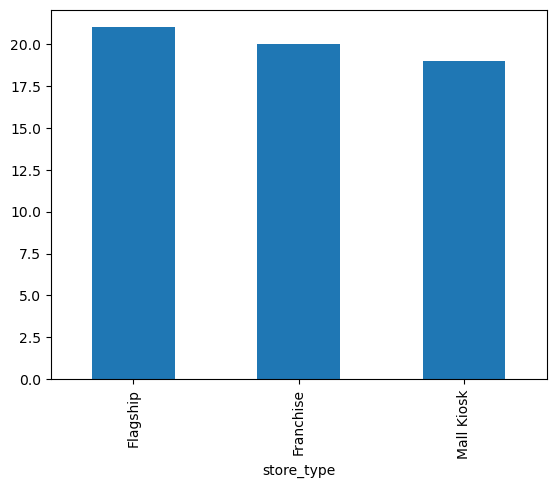

In [52]:
#Stores Tables
#Operating cost distribution
#Stores by region/city
#Compare store types (Franchise vs Flagship vs Mall Kiosk)

stores['operating_cost'].hist()
stores['store_type'].value_counts().plot(kind='bar')


<Axes: xlabel='return_date'>

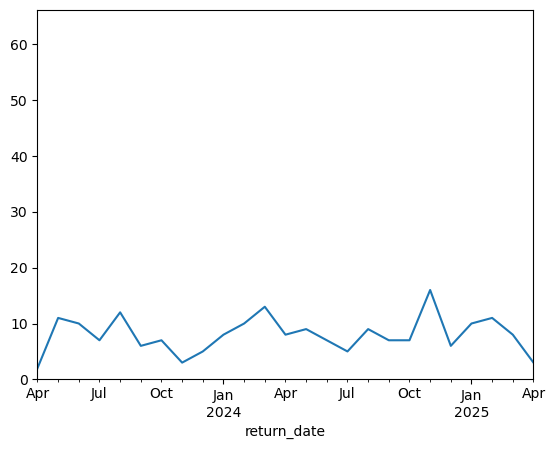

In [54]:
#Return Table
#Return reasons distribution
#Return trend over time
#Return rate = (returns / sales)

returns['return_reason'].value_counts().plot(kind='bar')
returns.groupby(returns['return_date'].dt.to_period('M'))['return_id'].count().plot(kind='line')


In [66]:
from sqlalchemy import create_engine

engine = create_engine(
    "mssql+pyodbc://@localhost/RetailSalesDB?driver=ODBC+Driver+17+for+SQL+Server"
)

In [70]:
import pyodbc

try:
    conn = pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=DESKTOP-VJFQJ8V\SQLEXPRESS;' 
        'DATABASE=RetailSalesDB;'
        'Trusted_Connection=yes;'
    )
    print("✅ Connection successful")
    conn.close()
except Exception as e:
    print("❌ Connection failed:", e)


<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\hp\AppData\Local\Temp\ipykernel_5504\619438590.py:6: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=DESKTOP-VJFQJ8V\SQLEXPRESS;'  # Replace with your server name


✅ Connection successful


In [76]:
from sqlalchemy import create_engine
import urllib

# SQL Server connection
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-VJFQJ8V\SQLEXPRESS;"
    "DATABASE=RetailSalesDB;"
    "Trusted_Connection=yes;"
)

engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

# Insert cleaned DataFrames into SQL Server
customers.to_sql("Customers", engine, if_exists="append", index=False, schema="dbo")
products.to_sql("Products", engine, if_exists="append", index=False, schema="dbo")
sales.to_sql("Sales", engine, if_exists="append", index=False, schema="dbo")
returns.to_sql("Returns", engine, if_exists="append", index=False, schema="dbo")
stores.to_sql("Stores", engine, if_exists="append", index=False, schema="dbo")

print("✅ All cleaned tables inserted successfully!")


<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\hp\AppData\Local\Temp\ipykernel_5504\564231261.py:7: SyntaxWarning: invalid escape sequence '\S'
  "SERVER=DESKTOP-VJFQJ8V\SQLEXPRESS;"


✅ All cleaned tables inserted successfully!
